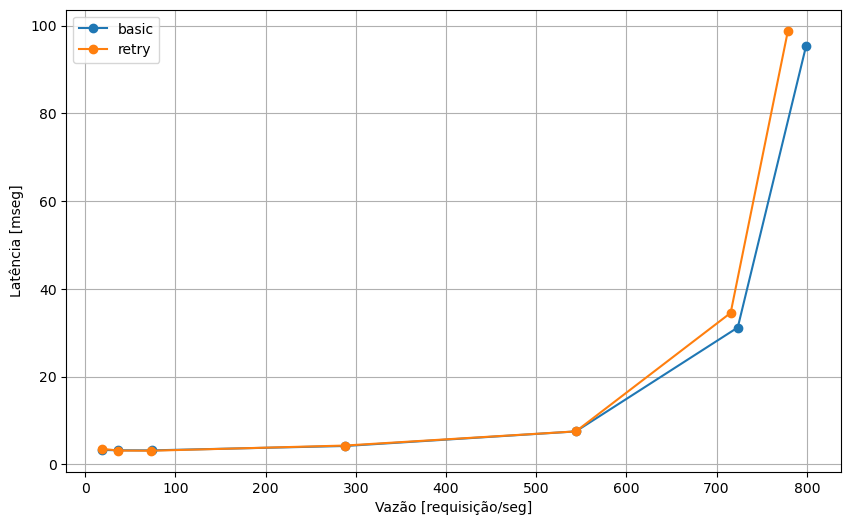

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def nanoseconds_to_milliseconds(nanoseconds):
    return nanoseconds / 10**6

def read_csv_files(folder_path):
    latency_data = pd.DataFrame()
    throughput_data = pd.DataFrame()

    latency_file_path = os.path.join(folder_path, 'latency.csv')
    if os.path.exists(latency_file_path):
        try:
            latency_data = pd.read_csv(latency_file_path)
        except pd.errors.ParserError:
            print(f"Error parsing latency data in {folder_path}")

    throughput_file_path = os.path.join(folder_path, 'throughput.csv')
    if os.path.exists(throughput_file_path):
        try:
            throughput_data = pd.read_csv(throughput_file_path)
        except pd.errors.ParserError:
            print(f"Error parsing throughput data in {folder_path}")

    return latency_data, throughput_data

def plot(server, experiment_date):
    folders = ['set1']

    all_latency_data = []
    all_throughput_data = []

    for folder in folders:
        folder_path = os.path.join(os.getcwd(), server, experiment_date, folder)
        if os.path.exists(folder_path):
            latency_data, throughput_data = read_csv_files(folder_path)
            if not latency_data.empty and not throughput_data.empty:
                all_latency_data.append(nanoseconds_to_milliseconds(latency_data['Latency'].mean()))
                all_throughput_data.append(throughput_data['Throughput'].mean())
            else:
                if latency_data.empty:
                    print(f"No latency data found in {folder}")
                if throughput_data.empty:
                    print(f"No throughput data found in {folder}")
        else:
            print(f"Folder '{folder}' does not exist.")

    if not all_latency_data or not all_throughput_data:
        print("No valid data found in any folders. Please check the data files.")
        exit()
    plt.plot(all_throughput_data, all_latency_data, marker='o', linestyle='-', label=server)
plt.figure(figsize=(10, 6))
plot('basic', '4-apr')
plot('retry', '8-apr')
plt.xlabel("Vazão [requisição/seg]")
plt.ylabel("Latência [mseg]")
plt.legend()
plt.grid(True)
plt.show()
